In [341]:
import pandas as pd

In [342]:
df = pd.read_csv('heart.csv')

In [343]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Data Anlaysis

## Missing Values

In [344]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Remove Outliers using Z score
 * Remove anything that has Z score > 3 or < -3

In [345]:
BP_mean = df.RestingBP.mean()
BP_standard_deviation = df.RestingBP.std()

In [346]:
Z = (df.RestingBP - BP_mean) / BP_standard_deviation

In [347]:
df['BP1'] = Z

In [348]:
df = df[(df['BP1'] <= 3) & (df['BP1'] >= -3)]

In [349]:
Cholesterol_mean = df.Cholesterol.mean()
Cholesterol_standard_deviation = df.Cholesterol.std()

In [350]:
Z = (df.Cholesterol - Cholesterol_mean) / Cholesterol_standard_deviation

In [351]:
df['C1'] = Z

In [352]:
df = df[(df['C1'] <= 3) & (df['C1'] >= -3)]

In [353]:
MaxHR_mean = df.MaxHR.mean()
MaxHR_deviation = df.MaxHR.std()

In [354]:
Z = (df.MaxHR - MaxHR_mean) / MaxHR_deviation

In [355]:
df['HR2'] = Z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [356]:
df = df[(df['HR2'] <= 3) & (df['HR2'] >= -3)]

In [357]:
df.drop(['BP1', 'C1', 'HR2'], axis = 1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [358]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BP1,C1,HR2
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685,0.823475,1.385705
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940,-0.175198,0.755693
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442,0.768502,-1.528100
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660,0.136315,-1.134343
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812,-0.037766,-0.583082


In [359]:
X = df.drop('HeartDisease', axis = 1)

In [360]:
y = df.HeartDisease

In [361]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.Sex = le.fit_transform(X.Sex)
X.ChestPainType = le.fit_transform(X.ChestPainType)
X.RestingECG = le.fit_transform(X.RestingECG)
X.ExerciseAngina = le.fit_transform(X.ExerciseAngina)
X.ST_Slope = le.fit_transform(X.ST_Slope)

In [362]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X= ss.fit_transform(X)

In [363]:
from sklearn.decomposition import PCA

In [364]:
pca = PCA(0.9)

In [365]:
X_pca = pca.fit_transform(X)

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.9)

In [367]:
len(X_train)

815

In [368]:
len(X_test)

91

In [369]:
from sklearn.ensemble import GradientBoostingClassifier

In [370]:
GBC = GradientBoostingClassifier()

In [371]:
GBC.fit(X_train, y_train)
GBC.score(X_test, y_test)

0.9010989010989011

In [372]:
y_pred = GBC.predict(X_test)

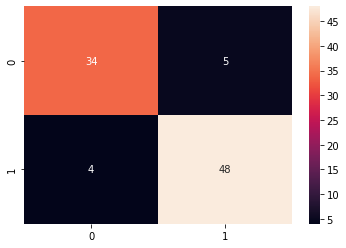

In [373]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)